In [9]:
if (!require(tidyverse)) install.packages("tidyverse", repos = "http://cran.us.r-project.org")
if (!require(ggrepel)) install.packages("ggrepel", repos = "http://cran.us.r-project.org") # For non-overlapping labels
if (!require(gapminder)) install.packages("gapminder")
if (!require(ggridges)) install.packages("ggridges")
if (!require(ggplot2)) install.packages("ggplot2")
if (!require(dplyr)) install.packages("dplyr")

Picking joint bandwidth of 2.24



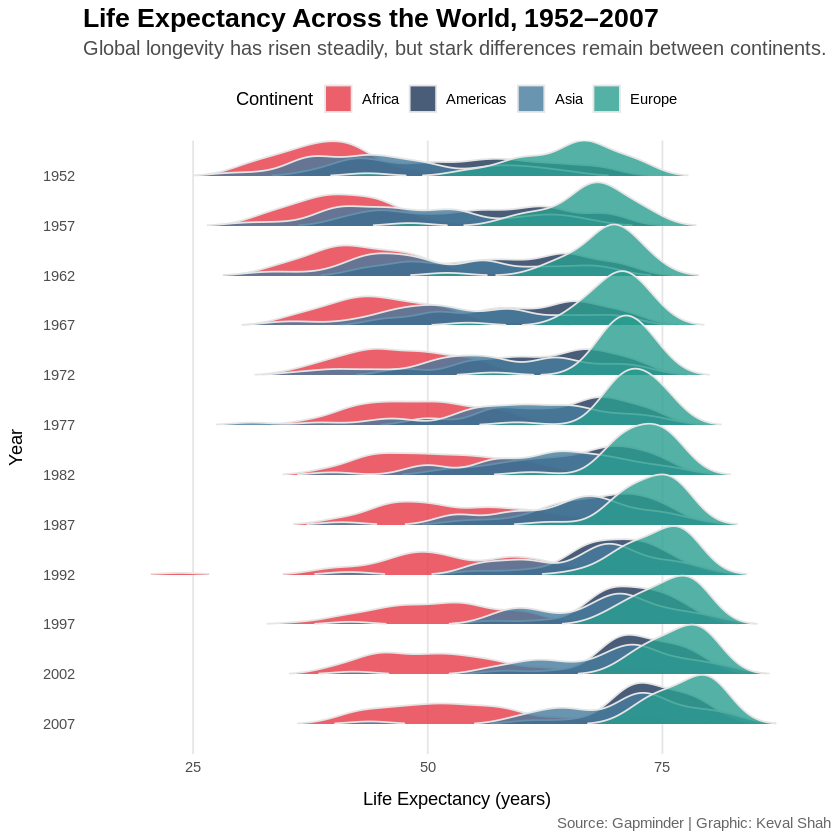

In [10]:
library(gapminder)
library(ggridges)
library(ggplot2)
library(dplyr)

# Palette
continent_colors <- c(
  "Africa"   = "#e63946",
  "Americas" = "#1d3557",
  "Asia"     = "#457b9d",
  "Europe"   = "#2a9d8f",
  "Oceania"  = "#f4a261"
)

ggplot(gapminder, aes(x = lifeExp, y = factor(year), fill = continent)) +
  geom_density_ridges(
    scale = 1.2,
    rel_min_height = 0.01,
    alpha = 0.8,
    color = "grey90"
  ) +
  scale_fill_manual(values = continent_colors) +
  labs(
    title = "Life Expectancy Across the World, 1952–2007",
    subtitle = "Global longevity has risen steadily, but stark differences remain between continents.",
    caption = "Source: Gapminder | Graphic: Keval Shah",
    x = "Life Expectancy (years)",
    y = "Year",
    fill = "Continent"
  ) +
  scale_y_discrete(limits = rev) +
  theme_minimal(base_family = "Helvetica") +
  theme(
    plot.title = element_text(size = 16, face = "bold", color = "black"),
    plot.subtitle = element_text(size = 12, color = "grey30", margin = margin(b = 10)),
    plot.caption = element_text(size = 9, color = "grey40", hjust = 1),
    axis.title.y = element_text(size = 11, margin = margin(r = 10)),
    axis.title.x = element_text(size = 11, margin = margin(t = 10)),
    panel.grid.major.x = element_line(color = "grey90"),
    panel.grid.major.y = element_blank(),
    panel.grid.minor = element_blank(),
    legend.position = "top"
  )


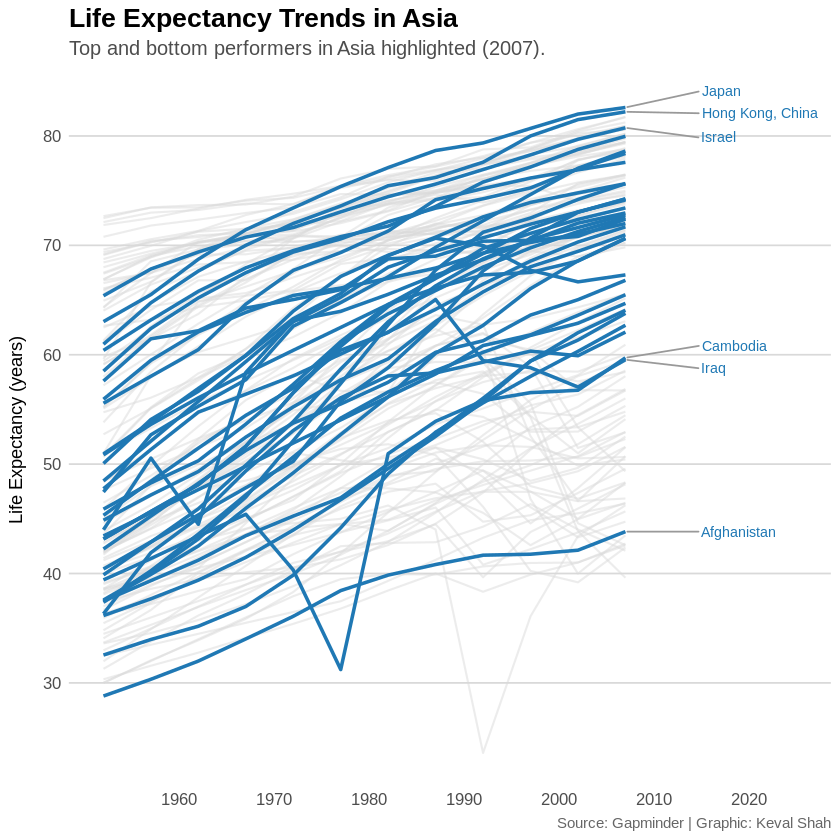

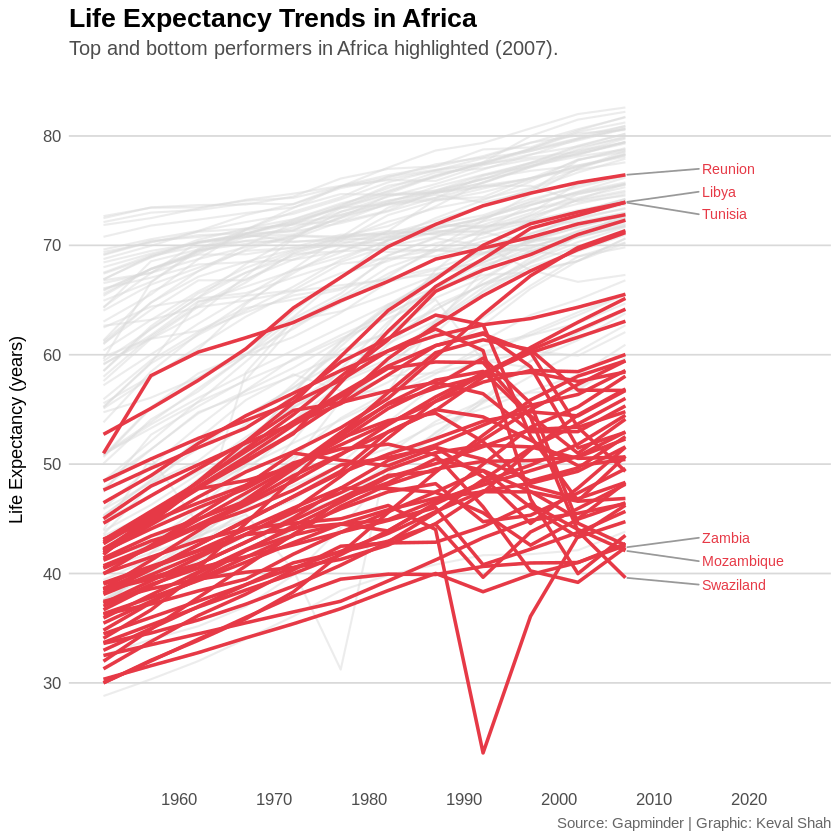

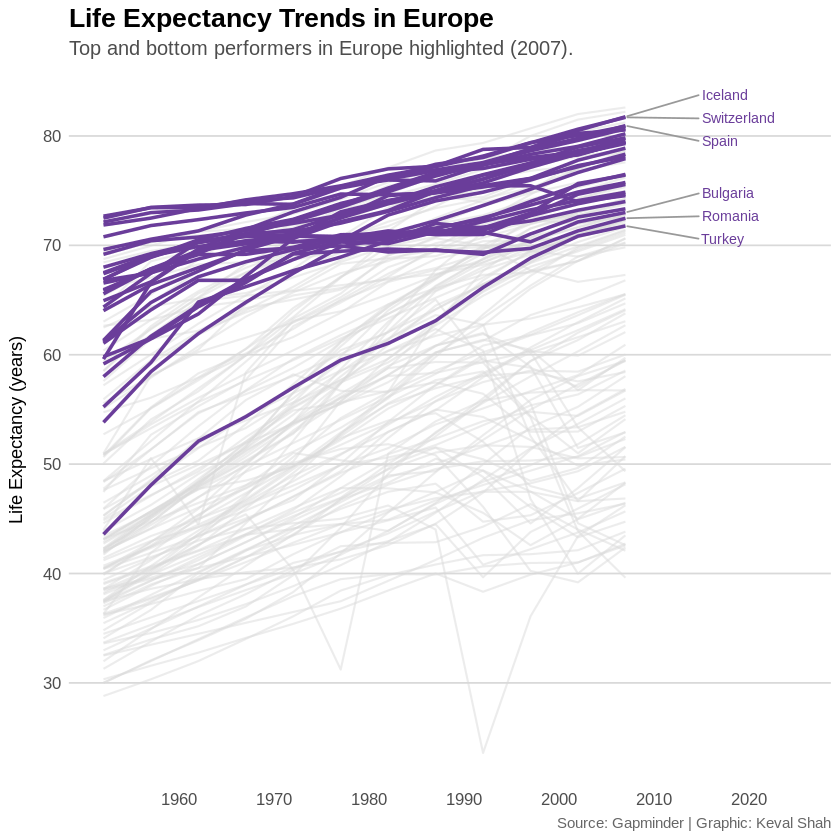

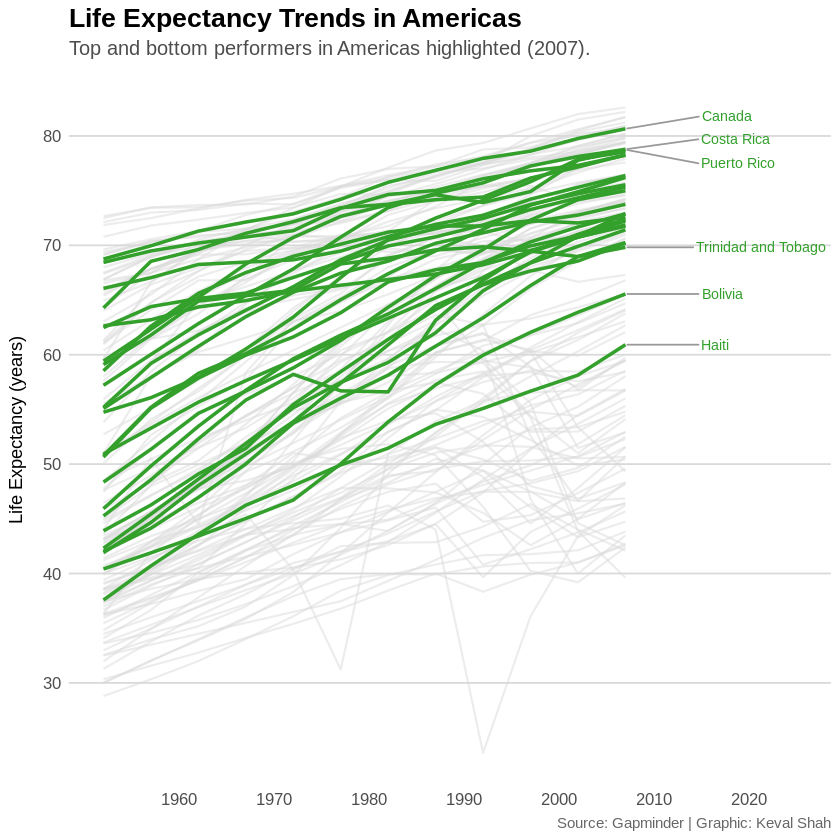

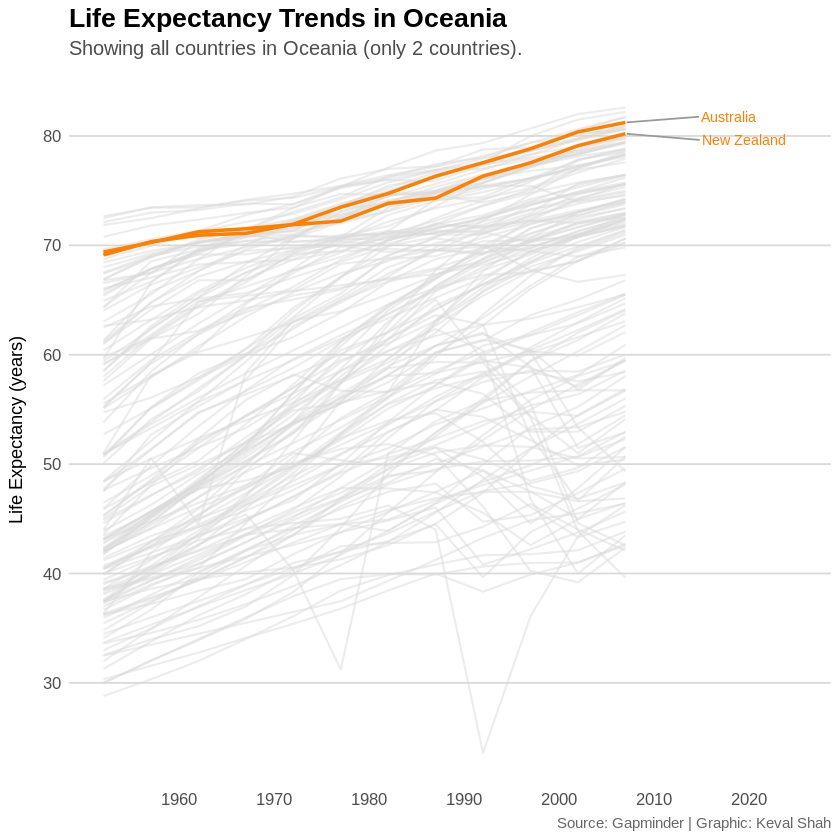

In [11]:
library(gapminder)
library(ggplot2)
library(dplyr)
library(ggrepel)

# Clean dataset
gapminder_clean <- gapminder %>% ungroup()

# Define highlight colors per continent
continent_colors <- c(
  "Africa"   = "#e63946",
  "Asia"     = "#1f78b4",
  "Europe"   = "#6a3d9a",
  "Americas" = "#33a02c",
  "Oceania"  = "#ff7f00"
)

plot_continent <- function(continent_name) {

  # Filter continent data for 2007
  highlight_2007 <- gapminder_clean %>%
    filter(year == 2007, continent == continent_name)

  n_countries <- nrow(highlight_2007)

  # Select countries to label
  if (n_countries <= 6) {
    label_countries <- highlight_2007
  } else {
    label_countries <- highlight_2007 %>%
      arrange(desc(lifeExp)) %>%
      slice(c(1:3, (n()-2):n()))
  }

  # Pick highlight color
  highlight_color <- continent_colors[[continent_name]]

  # Generate plot
  p <- ggplot(gapminder_clean, aes(x = year, y = lifeExp)) +
    # Background lines
    geom_line(aes(group = country), color = "grey85", alpha = 0.5, linewidth = 0.6) +

    # Highlighted continent lines
    geom_line(
      data = gapminder_clean %>% filter(continent == continent_name),
      aes(group = country), color = highlight_color, linewidth = 1
    ) +

    # Labels (top & bottom or all if small continent)
    geom_text_repel(
      data = label_countries,
      aes(x = year, y = lifeExp, label = country),
      size = 3,
      color = highlight_color,
      nudge_x = 8,
      hjust = 0,
      direction = "y",
      segment.color = "grey60",
      max.overlaps = Inf
    ) +

    scale_x_continuous(limits = c(1952, 2025), breaks = seq(1960, 2020, 10)) +
    scale_y_continuous(breaks = seq(20, 85, 10)) +

    labs(
      title = paste0("Life Expectancy Trends in ", continent_name),
      subtitle = if (n_countries <= 6) {
        paste0("Showing all countries in ", continent_name,
               " (only ", n_countries, " countries).")
      } else {
        paste0("Top and bottom performers in ", continent_name, " highlighted (2007).")
      },
      x = NULL,
      y = "Life Expectancy (years)",
      caption = "Source: Gapminder | Graphic: Keval Shah"
    ) +

    theme_minimal(base_family = "Helvetica") +
    theme(
      plot.title = element_text(size = 16, face = "bold", color = "black"),
      plot.subtitle = element_text(size = 12, color = "grey30", margin = margin(b = 10)),
      plot.caption = element_text(size = 9, color = "grey40", hjust = 1),
      axis.text = element_text(size = 10, color = "grey30"),
      axis.title.y = element_text(size = 11, margin = margin(r = 10)),
      panel.grid.major.x = element_blank(),
      panel.grid.minor = element_blank(),
      panel.grid.major.y = element_line(color = "grey85"),
      legend.position = "none"
    )

  return(p)
}

# Generate plots
plot_continent("Asia")
plot_continent("Africa")
plot_continent("Europe")
plot_continent("Americas")
plot_continent("Oceania")